In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from datetime import timedelta
from ipywidgets import widgets
import requests
from dotenv import load_dotenv
import mysql.connector
import os
pd.set_option('display.max_rows', 2000)
# Load environment variables such as API key stored in .env file
load_dotenv()

True

In [7]:
# Connect to 'air_pollution' MySQL database instance with user credentials 
cnx = mysql.connector.connect(user='root', password=os.environ.get('MY_SQL_DB_PASS'),
                            host='127.0.0.1',
                            database='air_pollution')
# Instatiate cursor for execution of SQL queries 
cursor = cnx.cursor()

In [14]:
columns = ["Date", "City", "Pollutant", "AQI", "AQI_Classification", "Action Days"]

with open('SQL\Query_Forecast.sql', 'r') as s:
    sql_query = s.read()

cursor.execute(sql_query)
data = pd.DataFrame(cursor.fetchall(), columns = columns)
if data.empty:
    print("No Dice")
else:
    print(data)

No Dice


In [15]:
with open('SQL\Query_Daily_Observations.sql', 'r') as s:
    sql_query = s.read()
with open('SQL\Query_air_now_data_columns.sql', 'r') as s:
    columns = s.read()
sql_query

"SELECT DISTINCT * \nFROM air_now_data WHERE (DateObserved) IN (\n SELECT MAX(DateObserved)\n  FROM air_now_data as d) AND ParameterName= 'O3';"

In [19]:

cursor.execute(columns)
x = cursor.fetchall()
x= pd.DataFrame(x, columns=['Columns'])
cursor.execute(sql_query)
pd.DataFrame(cursor.fetchall(), columns=x['Columns'])

Columns,DateObserved,HourObserved,LocalTimeZone,ReportingArea,StateCode,Longitude,Latitude,ParameterName,AQI,AQI_Number,AQI_Classification,DateYear,DateMonth,DateDay
0,2023-11-07,1,PST,Central LA CO,CA,-118.227,34.0663,O3,21,1,Good,2023,11,7
1,2023-11-07,1,PST,S Central LA CO,CA,-118.211,33.9288,O3,11,1,Good,2023,11,7
2,2023-11-07,1,PST,S San Gabriel Vly,CA,-118.069,34.0102,O3,16,1,Good,2023,11,7
3,2023-11-07,1,PST,SW Coastal LA,CA,-118.430,33.9541,O3,16,1,Good,2023,11,7
4,2023-11-07,1,PST,South Coastal LA,CA,-118.189,33.8236,O3,16,1,Good,2023,11,7
5,2023-11-07,1,PST,W San Gabriel Vly,CA,-118.127,34.1327,O3,18,1,Good,2023,11,7
6,2023-11-07,4,PST,Central LA CO,CA,-118.227,34.0663,O3,19,1,Good,2023,11,7
7,2023-11-07,4,PST,S Central LA CO,CA,-118.211,33.9288,O3,4,1,Good,2023,11,7
8,2023-11-07,4,PST,S San Gabriel Vly,CA,-118.069,34.0102,O3,12,1,Good,2023,11,7
9,2023-11-07,4,PST,SW Coastal LA,CA,-118.430,33.9541,O3,7,1,Good,2023,11,7


In [7]:
expected_columns = ["DateObserved","HourObserved","LocalTimeZone","ReportingArea","StateCode","Latitude","Longitude","ParameterName","AQI","CategoryNumber","CategoryName"]
response = requests.get(f'https://www.airnowapi.org/aq/observation/zipCode/current/?format=application/json&zipCode=98103&distance=25&API_KEY={os.environ.get("AIR_NOW_API_KEY")}')

response.json()

[{'DateObserved': '2023-11-02',
  'HourObserved': 15,
  'LocalTimeZone': 'PST',
  'ReportingArea': 'Seattle-Bellevue-Kent Valley',
  'StateCode': 'WA',
  'Latitude': 47.562,
  'Longitude': -122.3405,
  'ParameterName': 'O3',
  'AQI': 28,
  'Category': {'Number': 1, 'Name': 'Good'}},
 {'DateObserved': '2023-11-02',
  'HourObserved': 15,
  'LocalTimeZone': 'PST',
  'ReportingArea': 'Seattle-Bellevue-Kent Valley',
  'StateCode': 'WA',
  'Latitude': 47.562,
  'Longitude': -122.3405,
  'ParameterName': 'PM2.5',
  'AQI': 28,
  'Category': {'Number': 1, 'Name': 'Good'}}]

In [3]:
def get_counties_by_state(state_code):
    response = requests.get(f'https://aqs.epa.gov/data/api/list/countiesByState?email={os.environ.get("AIR_POLLUTION_EMAIL")}&key={os.environ.get("AIR_POLLUTION_KEY")}&state={state_code}').json()
    # Error handling for HTTP errors
    if response['Header'][0]['status'] not in "Success":
        print(f'Failed to access EPA API: status= {response["Header"][0]["status"]}, response body {response["Header"][0]["error"]}')
    
    return response

In [4]:
pollutants=["42101", "42401", "42602", "44201"]

In [5]:
def return_annual_summary(state_code="06", county="037",bdate=date.today().isoformat().replace('-', ''), edate=date.today().isoformat().replace('-', '')):
    response = requests.get(f'https://aqs.epa.gov/data/api/annualData/byCounty?email={os.environ.get("AIR_POLLUTION_EMAIL")}&key={os.environ.get("AIR_POLLUTION_KEY")}&param=42401,42101,42602,44201&bdate={bdate}&edate={edate}&state={state_code}&county={county}').json()

    # Error handling for HTTP errors
    # if response[0][0]['status'] not in "Success":
    #     print(f'Failed to access EPA API: status= {response["Header"][0]["status"]}, response body {response["Header"][0]["error"]}')
    
    return response

In [8]:
data = pd.DataFrame.from_dict(return_annual_summary(bdate="20230101", edate="20230601")['Data'])
data

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,037,4009,42401,1,33.793713,-118.171019,NAD83,Sulfur dioxide,1,...,0.600,0.100,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
1,06,037,4009,42602,1,33.793713,-118.171019,NAD83,Nitrogen dioxide (NO2),1,...,16.200,7.500,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
2,06,037,4009,42401,1,33.793713,-118.171019,NAD83,Sulfur dioxide,Y,...,0.100,0.000,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
3,06,037,4009,42401,1,33.793713,-118.171019,NAD83,Sulfur dioxide,X,...,0.200,0.000,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
4,06,037,4009,42401,1,33.793713,-118.171019,NAD83,Sulfur dioxide,1,...,0.100,0.000,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,06,037,1701,42602,2,34.067030,-117.751400,WGS84,Nitrogen dioxide (NO2),1,...,10.700,4.600,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14
100,06,037,1701,44201,1,34.067030,-117.751400,WGS84,Ozone,1,...,0.048,0.035,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14
101,06,037,1701,44201,1,34.067030,-117.751400,WGS84,Ozone,W,...,0.043,0.029,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14
102,06,037,1701,44201,1,34.067030,-117.751400,WGS84,Ozone,W,...,0.043,0.029,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14


In [14]:
data.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'metric_used', 'method',
       'year', 'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count',
       'null_observation_count', 'primary_exceedance_count',
       'secondary_exceedance_count', 'certification_indicator',
       'arithmetic_mean', 'standard_deviation', 'first_max_value',
       'first_max_datetime', 'second_max_value', 'second_max_datetime',
       'third_max_value', 'third_max_datetime', 'fourth_max_value',
       'fourth_max_datetime', 'first_max_nonoverlap_value',
       'first_max_n_o_datetime', 'second_max_nonoverlap_value',
       'second_max_n_o_datetime', 'ninety_ninth_percentile',
       'ninety_eighth_percentile', 'ninety_fifth_percentile'

In [13]:
data.loc[data['units_of_measure']=='Parts per million']

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
6,06,037,4009,44201,1,33.793713,-118.171019,NAD83,Ozone,1,...,0.045,0.037,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
7,06,037,4009,44201,1,33.793713,-118.171019,NAD83,Ozone,W,...,0.041,0.031,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
8,06,037,4009,44201,1,33.793713,-118.171019,NAD83,Ozone,W,...,0.041,0.031,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
10,06,037,4009,44201,1,33.793713,-118.171019,NAD83,Ozone,W,...,0.041,0.031,Signal Hill (LBSH),1710 E. 20th Street,California,Los Angeles,Signal Hill,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-05
13,06,037,0113,44201,1,34.051110,-118.456360,WGS84,Ozone,1,...,0.042,0.033,West Los Angeles,"VA HOSPITAL, WEST LOS ANGELES",California,Los Angeles,West Los Angeles,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,06,037,1701,42101,1,34.067030,-117.751400,WGS84,Carbon monoxide,Z,...,0.300,0.200,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14
100,06,037,1701,44201,1,34.067030,-117.751400,WGS84,Ozone,1,...,0.048,0.035,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14
101,06,037,1701,44201,1,34.067030,-117.751400,WGS84,Ozone,W,...,0.043,0.029,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14
102,06,037,1701,44201,1,34.067030,-117.751400,WGS84,Ozone,W,...,0.043,0.029,Pomona,"924 N. GAREY AVE., POMONA",California,Los Angeles,Pomona,31080,"Los Angeles-Long Beach-Anaheim, CA",2023-09-14


In [ ]:
get_counties_by_state("06")['Header'][0]['status']

'Success'

In [ ]:
pollution = pd.read_csv("pollution_2000_2022.csv").drop(columns=["Unnamed: 0"])
pollution.dtypes

Date                  object
Address               object
State                 object
County                object
City                  object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
dtype: object

## Column Descriptions
- Date: Date of data collection.
- Address: Specific location of data collection.
- State: U.S. state where data was collected.
- County: County within the state of data collection.
- City: City where data was collected.
- O3 Mean: Average Ozone level for the day.
- O3 1st Max Value: Highest Ozone level for the day.
- O3 1st Max Hour: Hour of highest Ozone level.
- O3 AQI: Air Quality Index for Ozone.
- CO Mean: Average Carbon Monoxide level for the day.
- CO 1st Max Value: Highest Carbon Monoxide level for the day.
- CO 1st Max Hour: Hour of highest Carbon Monoxide level.
- CO AQI: Air Quality Index for Carbon Monoxide.
- SO2 Mean: Average Sulphur Dioxide level for the day.
- SO2 1st Max Value: Highest Sulphur Dioxide level for the day.
- SO2 1st Max Hour: Hour of highest Sulphur Dioxide level.
- SO2 AQI: Air Quality Index for Sulphur Dioxide.
- NO2 Mean: Average Nitrogen Dioxide level for the day.
- NO2 1st Max Value: Highest Nitrogen Dioxide level for the day.
- NO2 1st Max Hour: Hour of highest Nitrogen Dioxide level.

In [ ]:
pollution.head()

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [ ]:
pollution["State"].unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Washington', 'Wisconsin', 'Massachusetts', 'Nevada',
       'New Hampshire', 'Tennessee', 'South Carolina', 'Connecticut',
       'Iowa', 'Maine', 'Maryland', 'Arkansas', 'Oregon', 'Wyoming',
       'North Dakota', 'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii',
       'Minnesota', 'New Mexico', 'Rhode Island', 'South Dakota', 'Utah',
       'Alabama', 'Alaska', 'Mississippi', 'Vermont'], dtype=object)

In [ ]:
print(f"# of states where detection occurs: {len(pollution['State'].unique())}")
print(f"# of counties where detection occurs: {len(pollution['County'].unique())}")
print(f"# of cities where detection occurs: {len(pollution['City'].unique())}")

# of states where detection occurs: 48
# of counties where detection occurs: 150
# of cities where detection occurs: 182


In [ ]:
states_to_regions = {
    'Washington': 'Pacific', 'Oregon': 'Pacific', 'California': 'Pacific', 'Nevada': 'Rocky Mountains',
    'Idaho': 'Rocky Mountains', 'Montana': 'Rocky Mountains', 'Wyoming': 'Rocky Mountains', 'Utah': 'Rocky Mountains',
    'Colorado': 'Rocky Mountains', 'Alaska': 'Noncontiguous', 'Hawaii': 'Noncontiguous', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'Southeast', 'District of Columbia': 'Southeast', 'Maryland': 'Southeast',
    'Virginia': 'Southeast', 'Kentucky': 'Southeast', 'Tennessee': 'Southeast', 'North Carolina': 'Southeast',
    'Mississippi': 'Southeast', 'Arkansas': 'Southeast', 'Louisiana': 'Southeast', 'Alabama': 'Southeast',
    'Georgia': 'Southeast', 'South Carolina': 'Southeast', 'Florida': 'Southeast', 'Delaware': 'Southeast',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}
pollution['Region'] = pollution["State"].map(states_to_regions)

In [ ]:
pollution

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Year,Month,Day,Region
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,...,21,13.0,19.041667,49.0,19,46,2000,1,1,Southwest
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,...,22,4.0,22.958333,36.0,19,34,2000,1,2,Southwest
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,...,19,16.0,38.125000,51.0,8,48,2000,1,3,Southwest
3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,...,8,23.0,40.260870,74.0,8,72,2000,1,4,Southwest
4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,...,7,21.0,48.450000,61.0,22,58,2000,1,5,Southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647246,2022-06-26,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.034000,0.042,10,39,0.000000,...,0,0.0,1.900000,5.4,23,5,2022,6,26,Rocky Mountains
647247,2022-06-27,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.044412,0.051,9,47,0.000000,...,0,0.0,3.258333,11.3,3,10,2022,6,27,Rocky Mountains
647248,2022-06-28,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.045235,0.056,9,54,0.008333,...,22,1.0,3.391667,11.8,23,10,2022,6,28,Rocky Mountains
647249,2022-06-29,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.041824,0.047,8,44,0.025000,...,0,1.0,4.263636,29.2,4,27,2022,6,29,Rocky Mountains


In [ ]:
# Type cast Date column from object to datetime format 
pollution['Date'] = pd.to_datetime(pollution['Date'], format='%Y-%m-%d')
pollution['Year'] = pollution['Date'].dt.year
pollution['Month'] =pollution['Date'].dt.month
pollution['Day'] = pollution['Date'].dt.day

In [ ]:
max(pollution.loc[pollution['City'] == "Phoenix"]['Date']) - min(pollution.loc[pollution['City'] == "Phoenix"]['Date'])

Timedelta('8308 days 00:00:00')

In [ ]:
pollution.loc[(pollution['State']=="California") & (pollution["Year"]==2022)]

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Year,Month,Day,Region
622046,2022-01-01,9925 International Blvd,California,Alameda,Oakland,0.017882,0.028,9,26,0.505556,...,6,8.0,12.856522,22.9,17,21,2022,1,1,Pacific
622047,2022-01-02,9925 International Blvd,California,Alameda,Oakland,0.011706,0.021,9,19,0.462500,...,0,7.0,13.504348,25.5,19,24,2022,1,2,Pacific
622048,2022-01-03,9925 International Blvd,California,Alameda,Oakland,0.027000,0.029,10,27,0.400000,...,0,7.0,8.291304,20.1,8,19,2022,1,3,Pacific
622049,2022-01-04,9925 International Blvd,California,Alameda,Oakland,0.021882,0.025,11,23,0.333333,...,9,5.0,11.191304,23.1,19,22,2022,1,4,Pacific
622050,2022-01-05,9925 International Blvd,California,Alameda,Oakland,0.014235,0.023,8,21,0.354167,...,7,5.0,14.660870,29.2,22,27,2022,1,5,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631983,2022-08-27,"103 Morris Street,",California,Sonoma,Sebastopol,0.019118,0.021,17,19,0.200000,...,0,2.0,0.665217,1.1,6,1,2022,8,27,Pacific
631984,2022-08-28,"103 Morris Street,",California,Sonoma,Sebastopol,0.024765,0.026,21,24,0.262500,...,9,3.0,0.813043,1.3,7,1,2022,8,28,Pacific
631985,2022-08-29,"103 Morris Street,",California,Sonoma,Sebastopol,0.024471,0.033,13,31,0.245833,...,13,3.0,1.130435,2.6,22,2,2022,8,29,Pacific
631986,2022-08-30,"103 Morris Street,",California,Sonoma,Sebastopol,0.025824,0.035,10,32,0.283333,...,0,3.0,1.652174,3.0,6,3,2022,8,30,Pacific


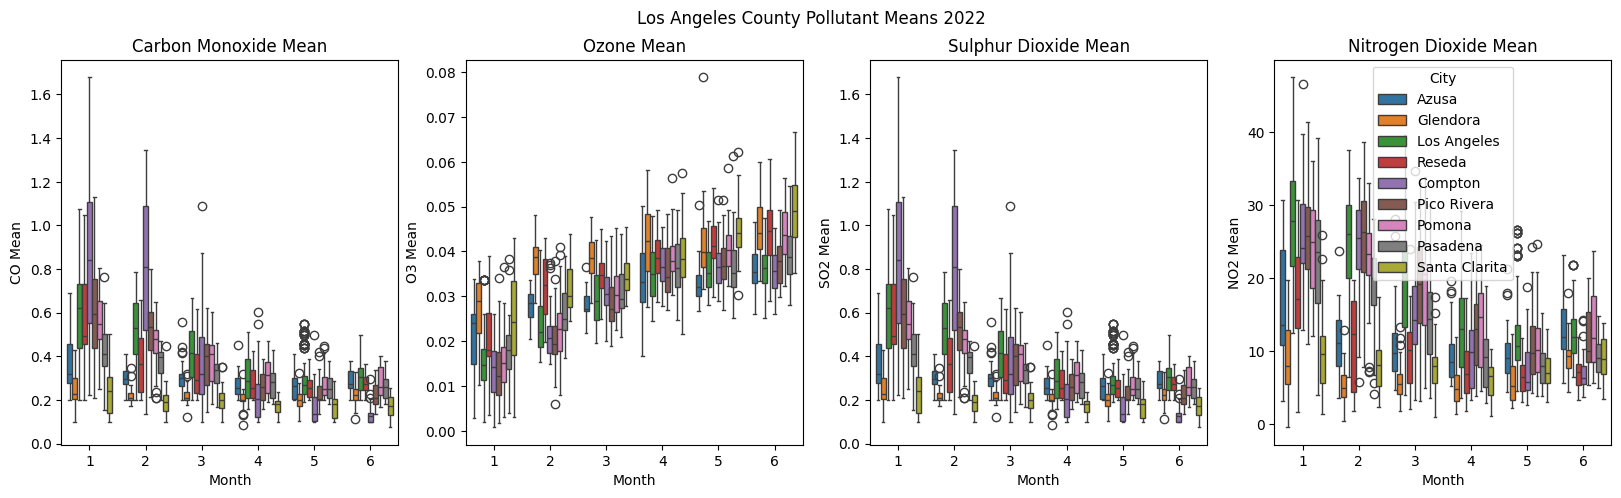

In [ ]:
fig, axes = plt.subplots(1, 4,figsize=(20, 5))
sns.boxplot(ax = axes[0], data = pollution.loc[(pollution['Date'].dt.year == 2022)& (pollution['County']=="Los Angeles")], x = 'Month', y = "CO Mean", hue = 'City', legend = False).set_title("Carbon Monoxide Mean")
sns.boxplot(ax = axes[1], data = pollution.loc[(pollution['Date'].dt.year == 2022)& (pollution['County']=="Los Angeles")], x = 'Month', y = "O3 Mean", hue = 'City', legend = False).set_title("Ozone Mean")
sns.boxplot(ax = axes[2], data = pollution.loc[(pollution['Date'].dt.year == 2022)& (pollution['County']=="Los Angeles")], x = 'Month', y = "SO2 Mean", hue = 'City', legend = False).set_title("Sulphur Dioxide Mean")
sns.boxplot(ax = axes[3], data = pollution.loc[(pollution['Date'].dt.year == 2022)& (pollution['County']=="Los Angeles")], x = 'Month', y = "NO2 Mean", hue = 'City', legend = True).set_title("Nitrogen Dioxide Mean")
fig.suptitle("Los Angeles County Pollutant Means 2022")
#
plt.show()

<Axes: xlabel='Month', ylabel='O3 Mean'>

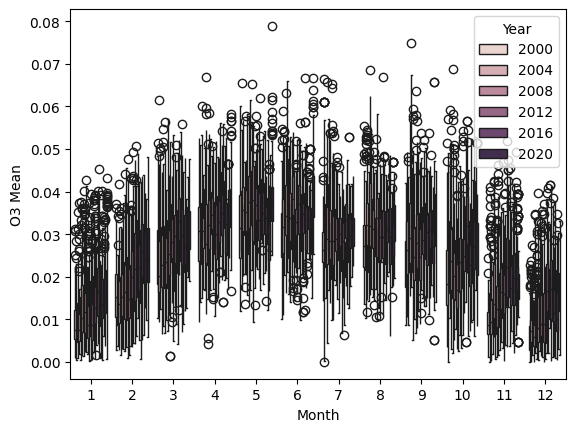

In [ ]:
sns.boxplot(data = pollution.loc[(pollution['County']=="Los Angeles")], x = 'Month', y = "O3 Mean", hue = 'Year')